In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/1_linear_reg/homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


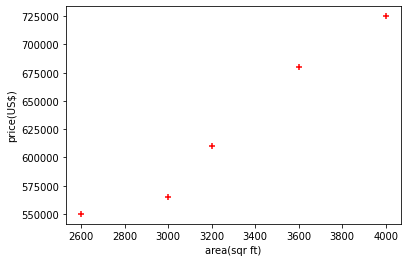

In [3]:
plt.xlabel('area(sqr ft)')
plt.ylabel('price(US$)')
plt.scatter(df.area, df.price, color='red', marker='+')

In [4]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df.price)

LinearRegression()

In [5]:
reg.predict([[3300]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [6]:
reg.coef_

array([135.78767123])

In [7]:
reg.intercept_

180616.43835616432

In [8]:
reg.coef_*3300+reg.intercept_

array([628715.75342466])

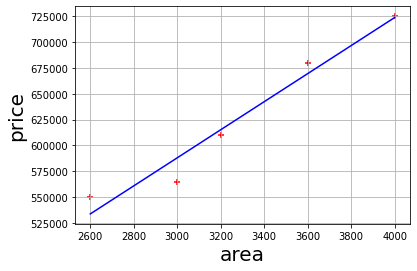

In [9]:
plt.xlabel('area', fontsize=20)
plt.ylabel('price', fontsize=20)
plt.scatter(df.area, df.price, color='r', marker='+')
plt.plot(df.area, reg.predict(df[['area']]), color='blue')
plt.grid()

In [10]:
import pickle
with open('reg', 'wb') as f:
  pickle.dump(reg, f)

In [11]:
with open('reg', 'rb') as f:
  model = pickle.load(f)

In [12]:
model.predict([[5000]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [13]:
from joblib import dump, load
dump(model, 'model_joblib')

['model_joblib']

In [14]:
model_1 = load('model_joblib')

In [15]:
model_1.predict([[5000]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [16]:
d = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/1_linear_reg/areas.csv')
d.head()

,area
0,1000
1,1500
2,2300
3,3540
4,4120


In [17]:
p = reg.predict(d)

In [18]:
d['prices'] = p

In [19]:
d.to_csv('predictions.csv', index=False)

In [20]:
d.head()

,area,prices
0,1000,316404.109589
1,1500,384297.945205
2,2300,492928.082192
3,3540,661304.794521
4,4120,740061.643836


# Linear Regression Multiple Variables

In [21]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [22]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/2_linear_reg_multivariate/homeprices.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [23]:
import math
median_bedrooms = math.floor(df.bedrooms.median())
median_bedrooms

4

In [24]:
df.bedrooms = df.bedrooms.fillna(median_bedrooms)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [25]:
reg = linear_model.LinearRegression()
reg.fit(df[['area', 'bedrooms', 'age']], df.price)

LinearRegression()

In [26]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [27]:
reg.intercept_

221323.00186540396

In [28]:
reg.predict([[3000, 3, 40]]).round(1)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.3])

### reg.predict()
* **y=m1*x2+m2*x2+m3*x3+b**
* m = reg.coef_
* b = reg.intercept_
* x1 = area
* x2 = median_bedrooms
* x3 = age

In [29]:
reg.predict([[2500, 4, 5]]).round(1)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([578876.])